In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2500)

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t", encoding='latin-1')

#Bei Ausfall wird Row gelöscht, bei Nan mit Mean der Column aufgefüllt
for column in list(data):
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        data = data[data[column] != "f?ñllt aus"]
        data = data[data[column] != "f?â?ñllt aus"]
        data[column] = pd.to_numeric(data[column])
        data[column].fillna(data[column].mean(), inplace = True)  

Text(0.5, 1.0, 'Durchschnittliche Verspätung / Haltestelle')

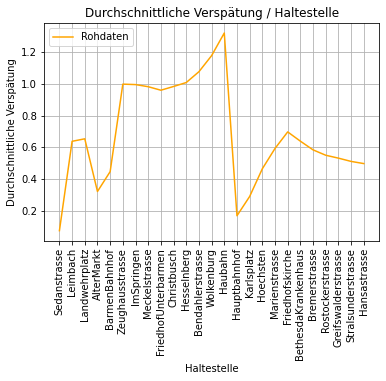

In [3]:
#Plot ohne Bereinigung von besonders großen Verspätungen
Haltestelle = []
Delay = []
for column in list(data):
    if ("Delay" in column):
        Haltestelle.append(column.replace("Delay", ""))
        Delay.append(data[column].mean())  
        #print(column + ": " + str(data[column].mean()))
        
plt.plot(Haltestelle, Delay, color = "orange", label = "Rohdaten")
plt.xticks(rotation = "vertical")
plt.grid()
plt.legend(loc = "upper left")
plt.xlabel("Haltestelle")
plt.ylabel("Durchschnittliche Verspätung")
plt.title("Durchschnittliche Verspätung / Haltestelle")

Text(0.5, 1.0, 'Durchschnittliche Verspätung / Haltestelle')

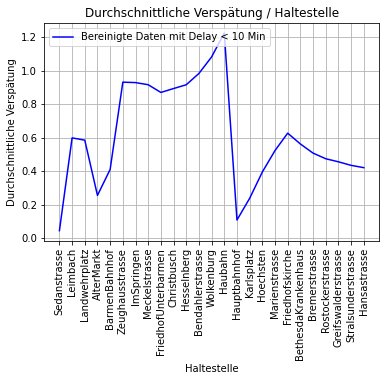

In [4]:
#Plot mit Berücksichtigung von Rows mit weniger als 10 Minuten Verspätung
CleanHaltestelle = []
CleanDelay = []
for column in list(data):
    if ("Delay" in column):
        data = data[data[column] <= 10]
        
for column in list(data):
    if ("Delay" in column):
        CleanHaltestelle.append(column.replace("Delay", ""))
        CleanDelay.append(data[column].mean())
        #print(column + ": " + str(data[column].mean()))
        
plt.plot(CleanHaltestelle, CleanDelay, color = "blue", label = "Bereinigte Daten mit Delay < 10 Min")
plt.xticks(rotation = "vertical")
plt.grid()
plt.legend(loc = "upper left")
plt.xlabel("Haltestelle")
plt.ylabel("Durchschnittliche Verspätung")
plt.title("Durchschnittliche Verspätung / Haltestelle")

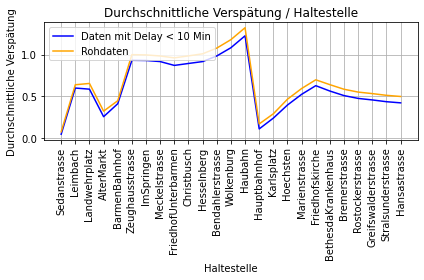

In [5]:
#Auch nach der Bereinigung der sehr großen Verspätungen zeigt sich, dass einige Haltestellen zu höheren bzw. häufigeren 
#Verspätungen neigen als andere. Extreme Verspätungen sind nur für einen kleinen Teil der hohen Durschnitte verantwortlich
plt.plot(CleanHaltestelle, CleanDelay, color = "blue", label = "Daten mit Delay < 10 Min")
plt.plot(Haltestelle, Delay, color = "orange", label = "Rohdaten")
plt.legend(loc = "upper left")
plt.xticks(rotation = "vertical")
plt.grid()
plt.xlabel("Haltestelle")
plt.ylabel("Durchschnittliche Verspätung")
plt.title("Durchschnittliche Verspätung / Haltestelle")
plt.tight_layout()
# plt.savefig("Durchschnittliche Verspätung", dpi = 200)